In [11]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [12]:
data_start = pd.read_csv('forestfires.csv')
data=data_start[['FFMC','DMC','DC','ISI','temp','RH']]
data=data.dropna()
print (data.head(10))

   FFMC    DMC     DC   ISI  temp  RH
0  86.2   26.2   94.3   5.1   8.2  51
1  90.6   35.4  669.1   6.7  18.0  33
2  90.6   43.7  686.9   6.7  14.6  33
3  91.7   33.3   77.5   9.0   8.3  97
4  89.3   51.3  102.2   9.6  11.4  99
5  92.3   85.3  488.0  14.7  22.2  29
6  92.3   88.9  495.6   8.5  24.1  27
7  91.5  145.4  608.2  10.7   8.0  86
8  91.0  129.5  692.6   7.0  13.1  63
9  92.5   88.0  698.6   7.1  22.8  40


In [13]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000


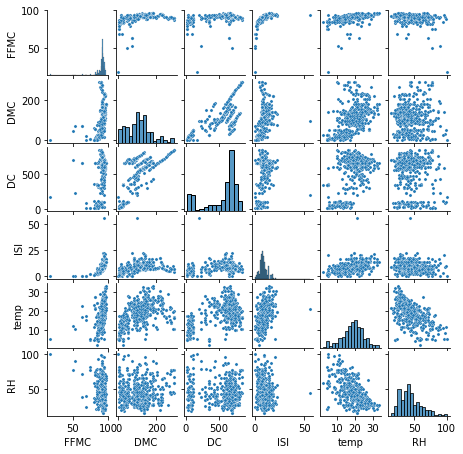

In [14]:
g=sns.pairplot(data, plot_kws={"s": 10})
g.fig.set_size_inches(6,6)

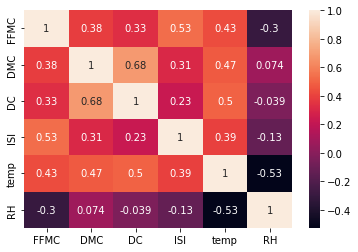

In [15]:
data.corr()
ax = sns.heatmap(data.corr(), annot = True)

In [16]:
print(st.pearsonr(data['FFMC'], data['DMC']))
print(st.pearsonr(data['FFMC'], data['DC']))
print(st.pearsonr(data['FFMC'], data['ISI']))
print(st.pearsonr(data['FFMC'], data['temp']))
print(st.pearsonr(data['FFMC'], data['RH']))

print(st.pearsonr(data['DMC'], data['DC']))
print(st.pearsonr(data['DMC'], data['ISI']))
print(st.pearsonr(data['DMC'], data['temp']))
print(st.pearsonr(data['DMC'], data['RH']))

print(st.pearsonr(data['DC'], data['ISI']))
print(st.pearsonr(data['DC'], data['temp']))
print(st.pearsonr(data['DC'], data['RH']))

print(st.pearsonr(data['ISI'], data['temp']))
print(st.pearsonr(data['ISI'], data['RH']))

print(st.pearsonr(data['temp'], data['RH']))

(0.38261880004942955, 1.8058235059941017e-19)
(0.33051179520454244, 1.2124563353444975e-14)
(0.5318049310435655, 4.3930926240201854e-39)
(0.43153225917862015, 7.290524963023048e-25)
(-0.3009954160617391, 2.7467741162127695e-12)
(0.6821916119833162, 4.802532656551495e-72)
(0.30512783486978273, 1.3325704247457141e-12)
(0.4695938443360307, 1.0261170134949621e-29)
(0.07379494110578147, 0.09370941831995093)
(0.22915416908818798, 1.3786398914988987e-07)
(0.4962080531052294, 1.7288341332307456e-33)
(-0.039191647189482655, 0.3738364607443168)
(0.3942871042080055, 1.1219245316856408e-20)
(-0.13251717724923412, 0.002534772627539762)
(-0.5273903386376693, 2.360985626126082e-38)


 
-1.482 x + 72.28
191.83038505390203


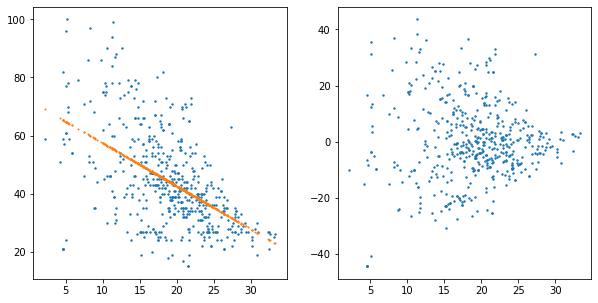

In [17]:
pole1='temp'
pole2='RH'
plt.figure(figsize=(10, 5))
plt.subplot (1, 2, 1)
z=np.polyfit(data[pole1], data[pole2],deg=1)
f = np.poly1d(z)
plt.scatter(data[pole1], data[pole2],s=2)
plt.scatter(data[pole1],f(data[pole1]),s=1)
print(f)
residuals = data[pole2]-f(data[pole1])
plt.subplot (1, 2, 2)
plt.scatter(data[pole1],residuals,s=2)
print(np.var(residuals))

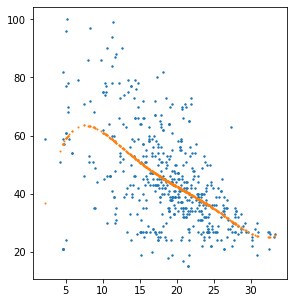

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot (1, 2, 1)
z=np.polyfit(data[pole1], data[pole2],deg=5)
f = np.poly1d(z)
plt.scatter(data[pole1], data[pole2],s=2)
plt.scatter(data[pole1],f(data[pole1]),s=1)

In [19]:
col = np.corrcoef(data[pole1], data[pole2]) [0] [1]
print ("Коэффициент кореляции:", col)

c = len(data) * np.sum(f(data[pole1]) ** 2) - np.sum(data[pole2]) ** 2
d =  len(data) * np.sum(data[pole2] ** 2) - np.sum(data[pole2]) ** 2

R = math.sqrt(c / d)
print ("Индекс кореляции:", R)

Коэффициент кореляции: -0.5273903386376689
Индекс кореляции: 0.545042754431418


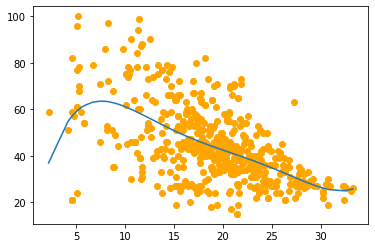

In [20]:
plt.plot(data[pole1].sort_values(), f(data[pole1].sort_values()))
plt.scatter(data[pole1],data[pole2], color="orange")

In [30]:
y=data['DC'].values
x=data[['temp','ISI','FFMC']].values.T
def reg_m(y, x):
    ones = np.ones(x.shape[1])
    X = sm.add_constant(np.column_stack((x[0],x[1], ones)))
    results = sm.OLS(y, X).fit()
    return results
print(reg_m(y, x).summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     84.55
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           1.80e-32
Time:                        15:52:42   Log-Likelihood:                -3510.1
No. Observations:                 517   AIC:                             7026.
Df Residuals:                     514   BIC:                             7039.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            20.5303      1.779     11.543      0.0